In [81]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
import nltk
#nltk.download('vader_lexicon')
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem.snowball import SnowballStemmer 
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from helper_functions import *



ticker = 'TSLA'
date_range = ['2020-01-01', '2021-03-05']
date = '2021-03-10'
window = 'year1month4'
interval = '5min'
website = 'alphavantage'

In [7]:
price = load_price_df(ticker, date)
df = load_news_df(ticker, date_range, website='finnhub')
df.drop_duplicates(subset='headline', inplace=True)
price_timestamp(df)
get_prices(df, price)

,headline,related,source,summary,price_ts,price,price_1d,price_1h
datetime,,,,,,,,
2021-03-05 07:30:41,Investing In Intangible Assets Revisited,TSLA,seekingalpha.com,"Intangible assets are becoming an increasingly important portion of not only company balance sheets, but also their ability to grow and generate profits.",2021-03-04 18:00:00,614.6000,596.520,620.5000
2021-03-05 00:00:00,"Tesla Should Sell Its Bitcoin and Buy Back Shares To Create 'Positive Momentum,' Says Analyst",TSLA,benzinga,"Tesla Inc (NASDAQ: TSLA) could create a “positive momentum” if its sold its Bitcoin (CRYPTO: BTC) holdings and initiated a buyback of its stock, according to...",2021-03-04 18:00:00,614.6000,596.520,620.5000
2021-03-04 21:33:00,Tesla Inc. stock underperforms Thursday when compared to competitors,TSLA,marketwatch,"Shares of Tesla Inc. slid 4.86% to $621.44 Thursday, on what proved to be an all-around grim trading session for the stock market, with the NASDAQ Composite...",2021-03-04 18:00:00,614.6000,596.520,620.5000
2021-03-04 13:48:00,EV Stocks NIO and Tesla Are Falling Again. It’s Not the Companies’ Fault.,TSLA,MarketWatch,"High-flying shares of electric-vehicle makers are falling yet again. Recent declines have been jarring, but external factors are to blame.",2021-03-04 13:50:00,605.7659,599.935,620.7223
2021-03-04 13:04:00,Bitcoin Is Hitting the Mainstream Even as Its Environmental Toll Mounts,TSLA,MarketWatch,"Ark Investment's Cathie Wood reiterated a bullish case for crypto at a conference, while Citigroup said it could be near a ""tipping point.""",2021-03-04 13:05:00,617.4200,580.480,604.4600
...,...,...,...,...,...,...,...,...
2021-02-12 05:53:52,Tesla’s $1.5 Billion Bitcoin Buy Could Forever Change Corporate Finance | The Daily Hodl,TSLA,https://dailyhodl.com,"Corporate uptake hits inflection point as Tesla’s Elon Musk buys Bitcoin.In a move that has electrified the crypto market, Tesla has added $1.5 billion worth of Bitcoin to its balance sheet and expects to accept the cryptoasset as payment in the near future.",2021-02-11 18:00:00,811.1900,815.700,802.6100
2021-02-12 00:06:58,Toyota Gets A Message About Battery Electric Vehicles For Mining,TSLA,seekingalpha.com,"Toyota is a big player in the light mining vehicle market, but diesel is a big problem in underground mining. Real competition will come from Tesla’s Cybertruck",2021-02-11 18:00:00,811.1900,815.700,802.6100
2021-02-12 00:03:17,"Today's Hot Mover- Tesla, Inc. (NASDAQ:TSLA) with the stream of 0.85% - Stocks Equity",TSLA,http://www.stocksequity.com,"On Thursday, shares of Tesla, Inc. (NASDAQ:TSLA) reached at $811.66 price level during last trade its distance from 20 days simple moving average was -4.27%, and its distance from 50 …",2021-02-11 18:00:00,811.1900,815.700,802.6100


In [8]:
df['change_1h'] = (df['price_1h'] - df['price'])/df['price']
df['change_1d'] = (df['price_1d'] - df['price'])/df['price']

# Sentiment analysis

In [9]:
vader = SentimentIntensityAnalyzer()
scores = pd.DataFrame.from_records(df['headline'].apply(vader.polarity_scores), index=df.index)
df = pd.concat([df, scores], axis=1)

In [53]:
price[(price.index > '2021-02-13') & (price.index <= '2021-02-17')] # no price data for 15th

,Open,High,Low,Close,Volume
2021-02-16 20:00:00,792.0500,792.4500,791.2000,791.4200,16958
2021-02-16 19:55:00,792.7900,792.9999,792.3000,792.3499,8526
2021-02-16 19:50:00,793.0900,793.5800,792.8000,792.8000,9725
2021-02-16 19:45:00,793.0900,793.3500,793.0000,793.0900,15069
2021-02-16 19:40:00,793.3000,793.8300,793.0500,793.2700,4810
...,...,...,...,...,...
2021-02-16 04:30:00,817.1000,817.5800,816.0000,816.4000,5949
2021-02-16 04:25:00,818.7300,818.7300,818.7300,818.7300,644
2021-02-16 04:20:00,820.1000,820.1000,820.0000,820.0000,4263
2021-02-16 04:10:00,821.9400,822.3000,821.3100,822.3000,1719


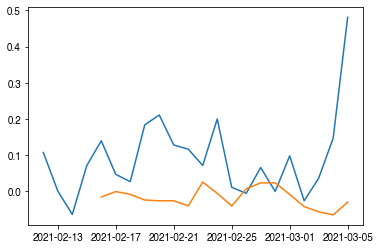

In [142]:
#df.groupby(df.index.date)['compound'].mean()
#df.groupby(df.index.date)['change_1d'].mean()
mean_df = df.groupby([df.index.date]).mean().unstack()
plt.plot(mean_df.xs('compound'))
plt.plot(mean_df.xs('change_1d'))

In [55]:
mean_df.xs('change_1d')

2021-02-12    0.005560
2021-02-13         NaN
2021-02-14         NaN
2021-02-15         NaN
2021-02-16   -0.015153
2021-02-17    0.000476
2021-02-18   -0.012480
2021-02-19   -0.014609
2021-02-20   -0.025721
2021-02-21   -0.025721
2021-02-22   -0.039882
2021-02-23    0.002854
2021-02-24    0.016116
2021-02-25   -0.060608
2021-02-26   -0.001247
2021-02-27    0.023774
2021-02-28    0.023774
2021-03-01    0.014573
2021-03-02   -0.045959
2021-03-03   -0.044922
2021-03-04   -0.068027
2021-03-05   -0.029418
dtype: float64

In [56]:
df.loc['2021-03-04']

,headline,related,source,summary,price_ts,price,price_1d,price_1h,change_1h,change_1d,neg,neu,pos,compound
datetime,,,,,,,,,,,,,,
2021-03-04 00:00:00,Tesla Secures Long-Term Supply Of Nickel For EV Batteries,TSLA,benzinga,Tesla Inc (NASDAQ: TSLA) secured a nickel supply Thursday for use in its electric vehicle batteries after the New Caledonia government reached an agreement with...,2021-03-03 18:00:00,659.6800,614.6000,656.8000,-0.004366,-0.068336,0.000,0.777,0.223,0.3182
2021-03-04 00:00:00,Tesla Secures Long-Term Supply Of Nickel For EV Batteries,TSLA,benzinga,Tesla Inc (NASDAQ: TSLA) secured a nickel supply Thursday for use in its electric vehicle batteries after the New Caledonia government reached an agreement with...,2021-03-03 18:00:00,659.6800,614.6000,656.8000,-0.004366,-0.068336,0.197,0.803,0.000,-0.4019
2021-03-04 00:00:00,Tesla Secures Long-Term Supply Of Nickel For EV Batteries,TSLA,benzinga,Tesla Inc (NASDAQ: TSLA) secured a nickel supply Thursday for use in its electric vehicle batteries after the New Caledonia government reached an agreement with...,2021-03-03 18:00:00,659.6800,614.6000,656.8000,-0.004366,-0.068336,0.000,1.000,0.000,0.0000
2021-03-04 00:00:00,Tesla Secures Long-Term Supply Of Nickel For EV Batteries,TSLA,benzinga,Tesla Inc (NASDAQ: TSLA) secured a nickel supply Thursday for use in its electric vehicle batteries after the New Caledonia government reached an agreement with...,2021-03-03 18:00:00,659.6800,614.6000,656.8000,-0.004366,-0.068336,0.000,0.777,0.223,0.3182
2021-03-04 00:00:00,Tesla Secures Long-Term Supply Of Nickel For EV Batteries,TSLA,benzinga,Tesla Inc (NASDAQ: TSLA) secured a nickel supply Thursday for use in its electric vehicle batteries after the New Caledonia government reached an agreement with...,2021-03-03 18:00:00,659.6800,614.6000,656.8000,-0.004366,-0.068336,0.000,0.833,0.167,0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-04 11:32:45,General Motors Stock: Worth The Wait,TSLA,seekingalpha.com,General Motors enters the EV market with scale that first movers may not ever achieve. Read why GM stock is positioned for long-term success in the EV market.,2021-03-04 11:35:00,639.4900,554.5800,621.6800,-0.027850,-0.132778,0.000,0.725,0.275,0.2263
2021-03-04 13:04:00,Bitcoin Is Hitting the Mainstream Even as Its Environmental Toll Mounts,TSLA,MarketWatch,"Ark Investment's Cathie Wood reiterated a bullish case for crypto at a conference, while Citigroup said it could be near a ""tipping point.""",2021-03-04 13:05:00,617.4200,580.4800,604.4600,-0.020991,-0.059830,0.000,1.000,0.000,0.0000
2021-03-04 13:48:00,EV Stocks NIO and Tesla Are Falling Again. It’s Not the Companies’ Fault.,TSLA,MarketWatch,"High-flying shares of electric-vehicle makers are falling yet again. Recent declines have been jarring, but external factors are to blame.",2021-03-04 13:50:00,605.7659,599.9350,620.7223,0.024690,-0.009626,0.108,0.740,0.152,0.1675


## Analysing words

In [59]:
# Remove stop words
df['tokenized'] = df['headline'].apply(lambda x: [word for word in WhitespaceTokenizer().tokenize(x.lower()) if word not in stopwords.words('english')])


In [60]:
def individual_word_sentiment(tokenized_words):
    sent_words = {'pos_words': [], 'neg_words': [], 'neu_words': []}
    for word in tokenized_words:
        if (vader.polarity_scores(word)['compound']) >= 0.1:
            sent_words['pos_words'].append(word)
        elif (vader.polarity_scores(word)['compound']) <= -0.1:
            sent_words['neg_words'].append(word)
        else:
            sent_words['neu_words'].append(word)    
    
    return sent_words

word_scores = pd.DataFrame.from_records(df['tokenized'].apply(individual_word_sentiment), index=df.index)
analyse_df = pd.concat([df, word_scores], axis=1)

In [62]:
analyse_df.sort_values('change_1d')[['headline', 'change_1d', 'pos_words', 'neg_words', 'neu_words', 'compound']]

,headline,change_1d,pos_words,neg_words,neu_words,compound
datetime,,,,,,
2021-03-04 11:32:45,General Motors Stock: Worth The Wait,-0.132778,[worth],[],"[general, motors, stock:, wait]",0.2263
2021-02-22 09:09:18,"US STOCKS-Wall St set to fall at open on inflation concerns, rising yields",-0.119921,[],[],"[us, stocks-wall, st, set, fall, open, inflation, concerns,, rising, yields]",0.0000
2021-02-22 10:08:53,"US STOCKS-Wall St falls as growth stocks slide; inflation concerns, rising yields weigh",-0.114919,[growth],[],"[us, stocks-wall, st, falls, stocks, slide;, inflation, concerns,, rising, yields, weigh]",0.3818
2021-02-22 10:09:00,"Home Depot, Lowe's, Nvidia Among Highlights Of Another Key Earnings Week",-0.114919,[],[],"[home, depot,, lowe's,, nvidia, among, highlights, another, key, earnings, week]",0.0000
2021-02-22 12:04:58,Asia Set To Boost Tesla's Energy Storage Numbers,-0.097905,"[boost, energy]",[],"[asia, set, tesla's, storage, numbers]",0.5859
...,...,...,...,...,...,...
2021-02-12 10:46:18,Tesla: Buying The Dip Is A Good Idea,NaN,[good],[],"[tesla:, buying, dip, idea]",0.4404
2021-02-12 10:38:00,Tesla is on this list of 20 S&P 500 companies that have produced the biggest sales increases along with pricing power,NaN,[],[],"[tesla, list, 20, s&p, 500, companies, produced, biggest, sales, increases, along, pricing, power]",0.0000
2021-02-12 10:37:34,FOREX-U.S. dollar rallies as risk appetite ebbs; bitcoin pulls back,NaN,[],[risk],"[forex-u.s., dollar, rallies, appetite, ebbs;, bitcoin, pulls, back]",-0.2732


In [71]:
# Stemming
df['tokenized'] = df['tokenized'].apply(lambda x: [SnowballStemmer(language='english').stem(word) for word in x])


datetime
2021-03-05 07:30:41                                                             [invest, intang, asset, revisit]
2021-03-05 00:00:00              [tesla, sell, bitcoin, buy, back, share, creat, posit, momentum,, say, analyst]
2021-03-04 21:33:00                             [tesla, inc., stock, underperform, thursday, compar, competitor]
2021-03-04 13:48:00                                   [ev, stock, nio, tesla, fall, again., it, compani, fault.]
2021-03-04 13:04:00                                   [bitcoin, hit, mainstream, even, environment, toll, mount]
                                                                 ...                                            
2021-02-12 05:53:52    [tesla, $1.5, billion, bitcoin, buy, could, forev, chang, corpor, financ, |, daili, hodl]
2021-02-12 00:06:58                                         [toyota, get, messag, batteri, electr, vehicl, mine]
2021-02-12 00:03:17           [today, hot, mover-, tesla,, inc., (nasdaq:tsla), stream,

In [86]:
df['tokenized'].apply(nltk.pos_tag)

datetime
2021-03-05 07:30:41                                                                                                                 [(investing, VBG), (intangible, JJ), (assets, NNS), (revisited, VBD)]
2021-03-05 00:00:00                          [(tesla, NN), (sell, NN), (bitcoin, NN), (buy, VB), (back, RB), (shares, NNS), (create, VBP), ('positive, CD), (momentum,', NN), (says, VBZ), (analyst, NN)]
2021-03-04 21:33:00                                                                     [(tesla, NN), (inc., NN), (stock, NN), (underperforms, NNS), (thursday, JJ), (compared, VBN), (competitors, NNS)]
2021-03-04 13:48:00                                                          [(ev, JJ), (stocks, NNS), (nio, VBP), (tesla, JJ), (falling, VBG), (again., JJ), (it’s, NN), (companies’, NN), (fault., NN)]
2021-03-04 13:04:00                                                                         [(bitcoin, NN), (hitting, VBG), (mainstream, NN), (even, RB), (environmental, JJ), (toll, N

In [95]:
def lemmatize(tokenized_words):
    word_type = {"verbs": [], "nouns": [], "adjectives": [], "adverbs": []}
    for word in nltk.pos_tag(tokenized_words):
        if word[1].startswith('V'):
            word_type["verbs"].append(WordNetLemmatizer().lemmatize(word[0], wordnet.VERB))
        if word[1].startswith('N'):
            word_type["nouns"].append(WordNetLemmatizer().lemmatize(word[0], wordnet.NOUN))
        if word[1].startswith('J'):
            word_type["adjectives"].append(WordNetLemmatizer().lemmatize(word[0], wordnet.NOUN))
        if word[1].startswith('R'):
            word_type["adverbs"].append(WordNetLemmatizer().lemmatize(word[0], wordnet.NOUN))
            
    return word_type
df['tokenized'].apply(lemmatize)

datetime
2021-03-05 07:30:41                                                                {'verbs': ['invest', 'revisit'], 'nouns': ['asset'], 'adjectives': ['intangible'], 'adverbs': []}
2021-03-05 00:00:00              {'verbs': ['buy', 'create', 'say'], 'nouns': ['tesla', 'sell', 'bitcoin', 'share', 'momentum,'', 'analyst'], 'adjectives': [], 'adverbs': ['back']}
2021-03-04 21:33:00                            {'verbs': ['compare'], 'nouns': ['tesla', 'inc.', 'stock', 'underperforms', 'competitor'], 'adjectives': ['thursday'], 'adverbs': []}
2021-03-04 13:48:00                           {'verbs': ['nio', 'fall'], 'nouns': ['stock', 'it’s', 'companies’', 'fault.'], 'adjectives': ['ev', 'tesla', 'again.'], 'adverbs': []}
2021-03-04 13:04:00                                    {'verbs': ['hit'], 'nouns': ['bitcoin', 'mainstream', 'toll', 'mount'], 'adjectives': ['environmental'], 'adverbs': ['even']}
                                                                                      